## Polytope Extremes-DT example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI regrid the data with earthkit-regrid, and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
!python3 ~/polytope-examples/desp-authentication.py -u <user_name> -p <password>

This will generate a token that can then be used by earthkit and polytope.

You can also run the script without arguments to enter your username and password.

In [ ]:
!python3 ~/polytope-examples/desp-authentication.py 

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

In [ ]:
import earthkit.data
import earthkit.plots
import earthkit.regrid

# This request matches a single parameter of the extremes DT, at 4km resolution
# which began production on 2023-12-11

request = {
        "class": "d1",
        "expver": "0001",
        "stream": "oper",
        "dataset": "extremes-dt",
        "date": "-5",
        "time": "0000",
        "type": "fc",
        "levtype": "sfc",
        "step": "0",
        "param": "167"
    }

#data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)


In [2]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,2t,heightAboveGround,2,20241121,0,0,fc,None,reduced_gg


In [3]:
# regrid to 1x1 degree
out_grid = {"grid": [1,1]}
data_interpolated = earthkit.regrid.interpolate(data, out_grid=out_grid, method="linear")

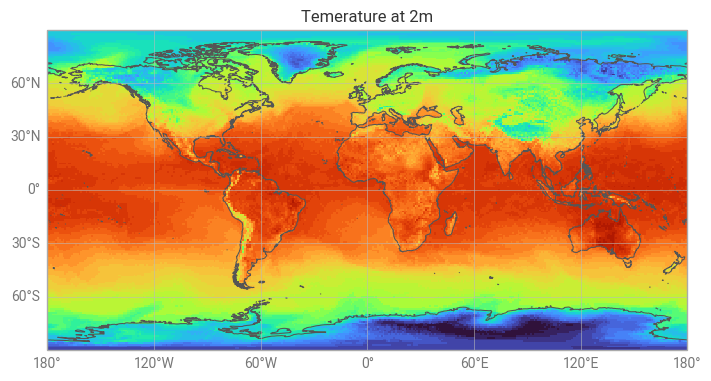

In [4]:
chart = earthkit.plots.Map()
chart.plot(
    data_interpolated[0]
)

chart.title("Temerature at 2m")
chart.coastlines()
chart.gridlines()
chart.show()

In [5]:
# Interpolate only on the values
res = earthkit.regrid.interpolate(data[0].values, {"grid": "O2560"}, {"grid": [1,1]})

In [6]:
# Helper functions for plotting
def make_lat_lon(dx):
    import numpy as np

    lat_v = np.linspace(90, -90, int(180/dx)+1)
    lon_v = np.linspace(0, 360-dx, int(360/dx))
    lon, lat = np.meshgrid(lon_v, lat_v)
    return lat, lon

def make_plot(r, dx):
    import matplotlib.pyplot as plt

    lat, lon = make_lat_lon(dx)

    print(r.size)
    # print(lat.size)
    # print(lon.size)
    v = r - 273.16

    fig, ax = plt.subplots()
    tcf = ax.tricontourf(lon.flatten(), lat.flatten(), v.flatten(), vmin=-20, vmax=36, levels=56, cmap="plasma")
    fig.colorbar(tcf)
    plt.show()

65160


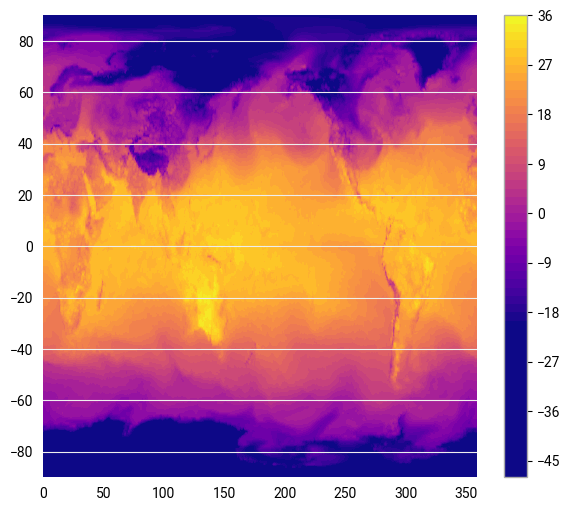

In [7]:
make_plot(res, 1)